# 5. Implementar técnicas fundamentales de segmentación de imágenes.
Capturen una escena con objetos de colores distintos de la Universidad Nacional o de la oficina de alguno de los integrantes del equipo. Debe ser con una cámara de un teléfono celular.
- Segmenten cada objeto por su color
- Cuenten cuántos objetos de cada color hay
- Calculen el área de cada objeto

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

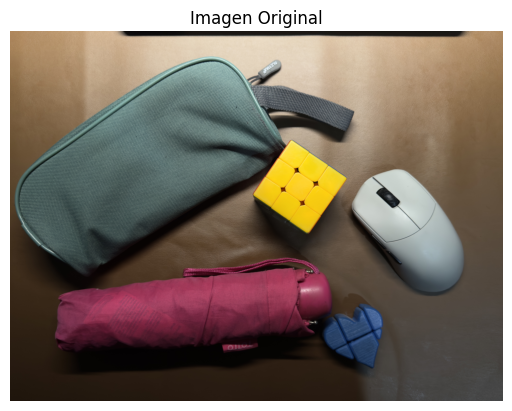

Información de la imagen:
 - Ancho: 6912 píxeles
 - Alto: 5184 píxeles
 - Canales: 3
 - Área total: 35831808 píxeles cuadrados


In [23]:
img = cv2.imread("./Images_P5/Escena.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis("off")
plt.show()

alto, ancho, canales = img_rgb.shape
area_total_imagen = alto * ancho

print("Información de la imagen:")
print(f" - Ancho: {ancho} píxeles")
print(f" - Alto: {alto} píxeles")
print(f" - Canales: {canales}")
print(f" - Área total: {area_total_imagen} píxeles cuadrados")

Color: verde
 - Objetos detectados: 1
 - Área total: 5868995.50 píxeles



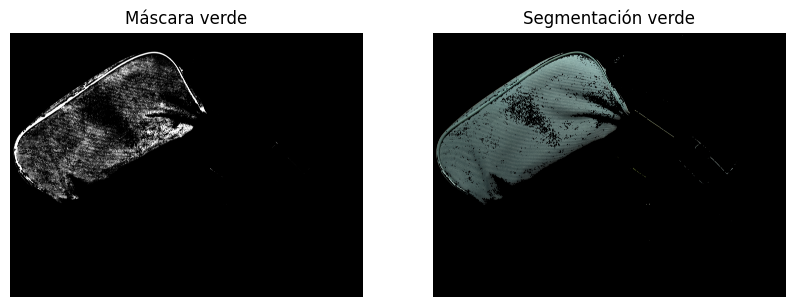

In [43]:
bajo_verde = np.array([40, 25, 40], dtype=np.uint8)
alto_verde = np.array([85, 180, 180], dtype=np.uint8)

mascara_verde = cv2.inRange(img_hsv, bajo_verde, alto_verde)
mascara_verde = cv2.GaussianBlur(mascara_verde, (9,9), 0)
kernel = np.ones((7,7), np.uint8)
mascara_verde = cv2.morphologyEx(mascara_verde, cv2.MORPH_OPEN, kernel)
mascara_verde = cv2.morphologyEx(mascara_verde, cv2.MORPH_CLOSE, kernel)
contornos_verde, _ = cv2.findContours(mascara_verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contornos_filtrados = [c for c in contornos_verde if cv2.contourArea(c) > 10000]
area_total = sum(cv2.contourArea(c) for c in contornos_filtrados)

print("Color: verde")
print(f" - Objetos detectados: {len(contornos_filtrados)}")
print(f" - Área total: {area_total:.2f} píxeles\n")

resultado_verde = cv2.bitwise_and(img_rgb, img_rgb, mask=mascara_verde)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(mascara_verde, cmap='gray')
plt.title("Máscara verde")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(resultado_verde)
plt.title("Segmentación verde")
plt.axis("off")
plt.show()

Color: amarillo
 - Objetos detectados: 1
 - Área total: 909172.00 píxeles



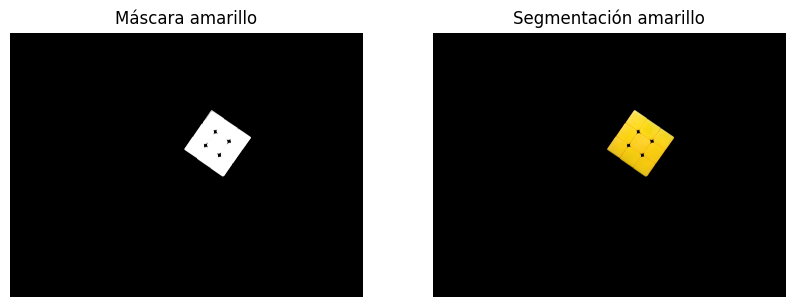

In [44]:
bajo_amarillo = np.array([20, 100, 150], dtype=np.uint8)
alto_amarillo = np.array([35, 255, 255], dtype=np.uint8)

mascara_amarillo = cv2.inRange(img_hsv, bajo_amarillo, alto_amarillo)
mascara_amarillo = cv2.GaussianBlur(mascara_amarillo, (9,9), 0)
kernel = np.ones((7,7), np.uint8)
mascara_amarillo = cv2.morphologyEx(mascara_amarillo, cv2.MORPH_OPEN, kernel)
mascara_amarillo = cv2.morphologyEx(mascara_amarillo, cv2.MORPH_CLOSE, kernel)
contornos_amarillo, _ = cv2.findContours(mascara_amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contornos_filtrados = [c for c in contornos_amarillo if cv2.contourArea(c) > 1500]
area_total = sum(cv2.contourArea(c) for c in contornos_filtrados)

print("Color: amarillo")
print(f" - Objetos detectados: {len(contornos_filtrados)}")
print(f" - Área total: {area_total:.2f} píxeles\n")

resultado_amarillo = cv2.bitwise_and(img_rgb, img_rgb, mask=mascara_amarillo)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(mascara_amarillo, cmap='gray')
plt.title("Máscara amarillo")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(resultado_amarillo)
plt.title("Segmentación amarillo")
plt.axis("off")
plt.show()

In [ ]:
bajo_rosado = np.array([150, 50, 100], dtype=np.uint8)
alto_rosado = np.array([180, 255, 255], dtype=np.uint8)

mascara_rosado = cv2.inRange(img_hsv, bajo_rosado, alto_rosado)
mascara_rosado = cv2.GaussianBlur(mascara_rosado, (9,9), 0)
kernel = np.ones((7,7), np.uint8)
mascara_rosado = cv2.morphologyEx(mascara_rosado, cv2.MORPH_OPEN, kernel)
mascara_rosado = cv2.morphologyEx(mascara_rosado, cv2.MORPH_CLOSE, kernel)
contornos_rosado, _ = cv2.findContours(mascara_rosado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contornos_filtrados = [c for c in contornos_rosado if cv2.contourArea(c) > 1500]
area_total = sum(cv2.contourArea(c) for c in contornos_filtrados)

print("Color: rosado")
print(f" - Objetos detectados: {len(contornos_filtrados)}")
print(f" - Área total: {area_total:.2f} píxeles\n")

resultado_rosado = cv2.bitwise_and(img_rgb, img_rgb, mask=mascara_rosado)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(mascara_rosado, cmap='gray')
plt.title("Máscara rosado")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(resultado_rosado)
plt.title("Segmentación rosado (paraguas)")
plt.axis("off")
plt.show()

Color: rosado
 - Objetos detectados: 2
 - Área total: 2773842.50 píxeles

